# Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape
# 28 * 28 grid

(28, 28)

In [5]:
x_train[0]
# ranges between 0 and 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

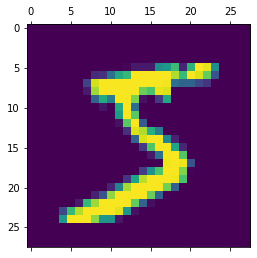

In [6]:
plt.matshow(x_train[0])

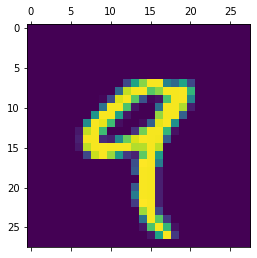

In [7]:
plt.matshow(x_train[4])

In [8]:
y_train[4]

9

### we have to flatten our training dataset.
### that is, we will convert 28*28 (2-D array) pixel into single dim array.
### so that will have 784 elements

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
x_train_flatten.shape

(60000, 784)

In [15]:
# similarly for x_test

In [16]:
x_test_flatten = x_test.reshape(len(x_test), 28*28)
x_test_flatten


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
x_test_flatten.shape

(10000, 784)

In [18]:
x_train_flatten[0]
# finally we have converted 2-D array to single dim array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
model =  keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )
model.fit(x_train_flatten, y_train, epochs=5)
# scaling to be done if we get a low accuracy...

Epoch 1/5
1875/1875 [==============================] - 1s 498us/step - loss: 0.4853 - accuracy: 0.8816
Epoch 2/5
1875/1875 [==============================] - 1s 493us/step - loss: 0.3068 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 485us/step - loss: 0.2860 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 486us/step - loss: 0.2748 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 1s 494us/step - loss: 0.2677 - accuracy: 0.9261


In [20]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 428us/step - loss: 0.2691 - accuracy: 0.9250


[0.2690569758415222, 0.925000011920929]

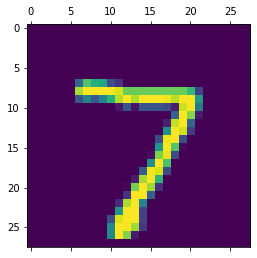

In [21]:
plt.matshow(x_test[0])

In [22]:
y_pred = model.predict(x_test_flatten)
y_pred[0]

array([1.2969048e-05, 8.8455000e-11, 4.5478060e-05, 1.4439344e-02,
       5.8908626e-07, 9.1110785e-05, 1.2075000e-09, 7.0953983e-01,
       7.4459109e-05, 6.8402290e-04], dtype=float32)

In [23]:
np.argmax(y_pred[0])

7

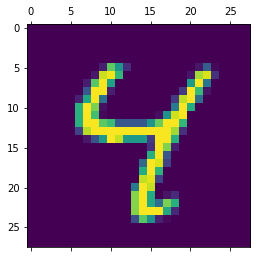

In [24]:
plt.matshow(x_test[6])

In [25]:
np.argmax(y_pred[6])

4

In [26]:
y_pred_labels = [np.argmax(i) for i in y_pred ]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

In [28]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    8,  912,   31,    8,    2,   13,   10,   42,    3],
       [   1,    0,   12,  943,    0,   18,    2,   10,   19,    5],
       [   1,    1,    3,    1,  917,    0,   13,    4,   11,   31],
       [   7,    1,    2,   45,    6,  772,   15,    4,   34,    6],
       [   7,    3,    7,    1,    7,    9,  919,    2,    3,    0],
       [   1,    6,   20,   15,    6,    0,    0,  946,    5,   29],
       [   6,    7,    5,   33,    9,   23,    8,    9,  869,    5],
       [   9,    6,    2,   15,   30,    7,    0,   26,   12,  902]])>

### confusion matrix...

Text(69.0, 0.5, 'truth')

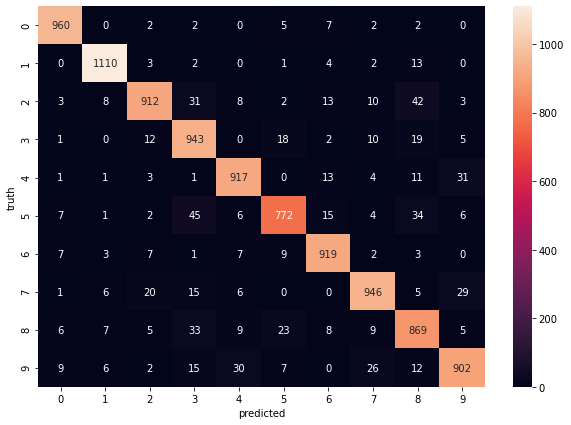

In [29]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")

### now we can add hidden layer for our code to improve the performance...

In [31]:
model =  keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 831us/step - loss: 0.2939 - accuracy: 0.9182
Epoch 2/5
1875/1875 [==============================] - 2s 833us/step - loss: 0.1305 - accuracy: 0.96170s - loss: 0.136
Epoch 3/5
1875/1875 [==============================] - 2s 822us/step - loss: 0.0948 - accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 2s 924us/step - loss: 0.0761 - accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.0626 - accuracy: 0.9806


In [32]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 522us/step - loss: 0.0978 - accuracy: 0.9712


[0.09779620170593262, 0.9711999893188477]

Text(69.0, 0.5, 'truth')

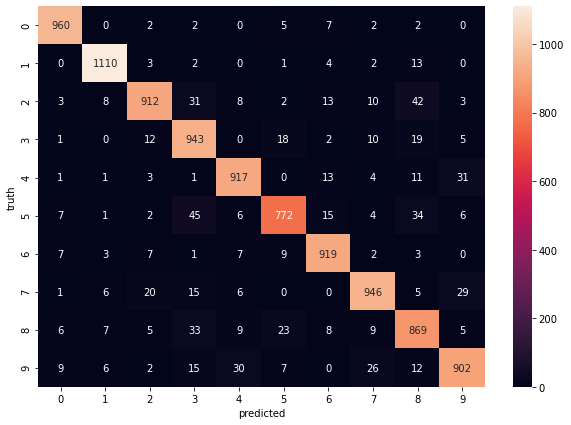

In [33]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")

### instead of flattening an array manually, we can use an keras.Flatten method

### i.e.,

In [39]:
model =  keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,  activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"]
              )
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 751us/step - loss: 0.2948 - accuracy: 0.9182
Epoch 2/5
1875/1875 [==============================] - 1s 732us/step - loss: 0.1463 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 1s 701us/step - loss: 0.1055 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 1s 724us/step - loss: 0.0818 - accuracy: 0.9754
Epoch 5/5
1875/1875 [==============================] - 2s 930us/step - loss: 0.0654 - accuracy: 0.9791
